# 6CS012 - Artificial Intelligence and Machine Learning.

## Worksheet 5

**Implement an End to End CNN Model for Image Classification Task**

## Task 1: Data Understanding and Visualization:

1. Load and visualize images from a dataset stored in directories, where each subdirectory represents a class. You are expected to write a code:

- Get the list of class directories from the train folder.

- Select one image randomly from each class.

- Display the images in a grid format with two rows using matplotlib.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import random
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [3]:
train_dir = "/content/drive/MyDrive/AI-Workshop/FruitinAmazon/train"
test_dir = "/content/drive/MyDrive/AI-Workshop/FruitinAmazon/test"

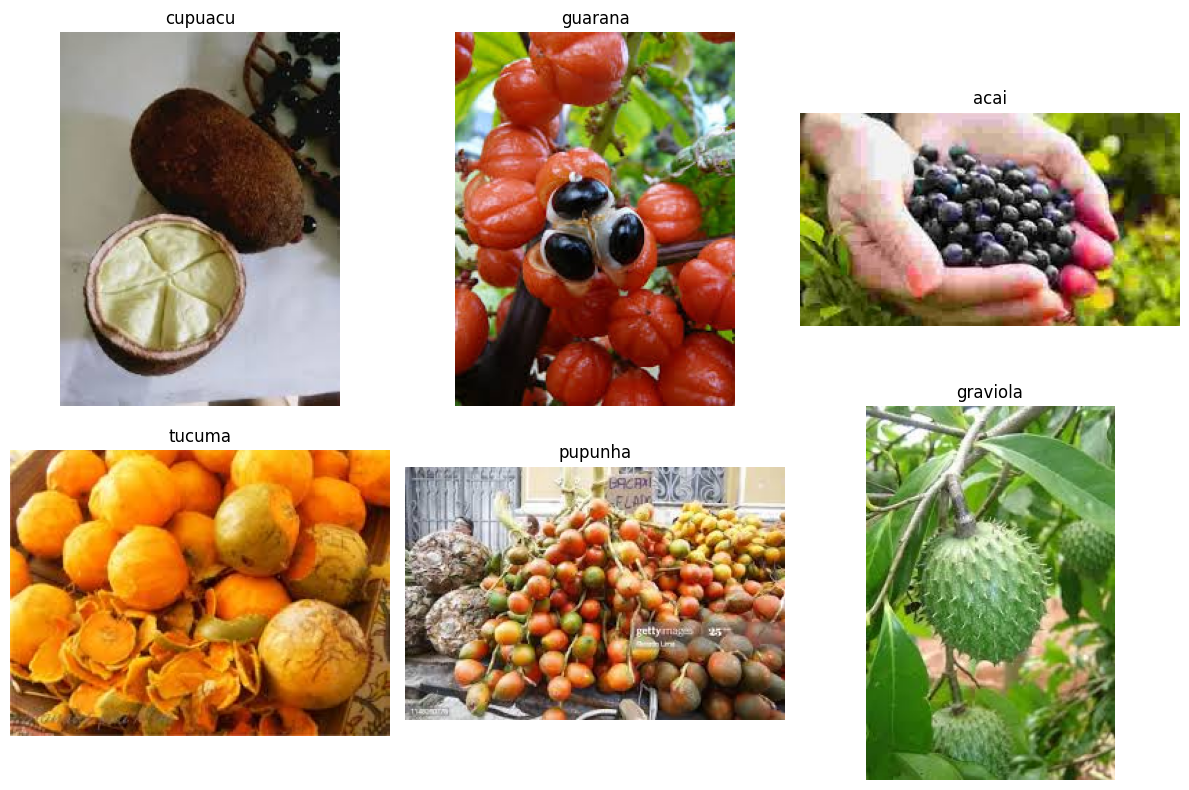

In [4]:
# list of class directories
class_dir = os.listdir(train_dir)

# list to hold the images and labels
images = []
labels = []

for class_name in class_dir:
  class_path = os.path.join(train_dir, class_name)
  image_files = os.listdir(class_path)

  # select a random image from each class
  random_image = random.choice(image_files)
  random_image_path = os.path.join(class_path, random_image)

  images.append(mpimg.imread(random_image_path))
  labels.append(class_name)

# plot the images in 2 rows, divide the columns accordingly
fig, axes = plt.subplots(nrows=2, ncols=len(class_dir)//2, figsize=(12, 8))
axes = axes.ravel()

for i in range(len(images)):
  ax = axes[i]
  ax.imshow(images[i])
  ax.set_title(labels[i])
  ax.axis('off')

plt.tight_layout()
plt.show()

2. Check for Corrupted Image: Write a script that verifies whether the image in the train directory are valid. If any corrupted images are found, the script must remove the image from the directory and print the message which image have been removed, if none found print ”No Corrupted Images Found.”

- Hint:

  – Iterate through each class subdirectory and check if each image is valid.

  – Use the Image.open() function to attempt to load each image.

  – If the image is corrupted i.e. raises an IOError or SyntaxError, remove the image from the directory and print f"Removed corrupted image: {image_path}".

  – Maintain a list of all corrupted image paths for reporting.

- Expected Output: No corrupted images found.

In [5]:
# list to store path to corrupted images
corrupted_images = []

# iterate through each class directory
for class_name in class_dir:
  class_path = os.path.join(train_dir, class_name)
  # ensure it's a directory
  if os.path.isdir(class_path):
      # iterate through all image files in the class directory
      for image_name in os.listdir(class_path):
          image_path = os.path.join(class_path, image_name)

          # check if the file is an image (assuming common formats)
          if image_path.lower().endswith(('jpg', 'jpeg', 'png', 'gif')):
              try:
                  # try to open the image
                  with Image.open(image_path) as img:
                      img.verify()  # verify the image is not corrupted
                      width, height = img.size

                      # print the height
                      print(f"Image Height: {height} pixels")
              except (IOError, SyntaxError) as e:
                  # if an error occurs, it means the image is corrupted
                  corrupted_images.append(image_path)
                  os.remove(image_path)  # remove the corrupted image
                  print(f"Removed corrupted image: {image_path}")

# check if any corrupted images were found
if not corrupted_images:
    print("No corrupted images found.")

Image Height: 225 pixels
Image Height: 168 pixels
Image Height: 184 pixels
Image Height: 217 pixels
Image Height: 179 pixels
Image Height: 259 pixels
Image Height: 176 pixels
Image Height: 168 pixels
Image Height: 176 pixels
Image Height: 174 pixels
Image Height: 224 pixels
Image Height: 180 pixels
Image Height: 183 pixels
Image Height: 225 pixels
Image Height: 194 pixels
Image Height: 183 pixels
Image Height: 160 pixels
Image Height: 168 pixels
Image Height: 183 pixels
Image Height: 183 pixels
Image Height: 219 pixels
Image Height: 168 pixels
Image Height: 259 pixels
Image Height: 200 pixels
Image Height: 183 pixels
Image Height: 194 pixels
Image Height: 168 pixels
Image Height: 205 pixels
Image Height: 174 pixels
Image Height: 194 pixels
Image Height: 170 pixels
Image Height: 162 pixels
Image Height: 181 pixels
Image Height: 189 pixels
Image Height: 221 pixels
Image Height: 155 pixels
Image Height: 183 pixels
Image Height: 183 pixels
Image Height: 183 pixels
Image Height: 190 pixels


## Task 2: Loading and Preprocessing Image Data in keras:

In this section, we will load and preprocess image data from a directory using the image dataset from directory function in Keras.

This function is used to load images from a directory structure where subdirectories represent different classes. We will also apply basic preprocessing, including resizing and batching and normalization of images. The same function can be used to load train and validation data.

Sample Implementation.

train_ds = tf.keras.preprocessing.image_dataset_from_directory( train_dir, labels=’inferred’, label_mode=’int’, image_size=(img_height, img_width), interpolation=’nearest’, batch_size=batch_size, shuffle=True, validation_split=validation_split, subset=’training’, seed=123 )

In [21]:
# Define image size and batch size
img_height = 128
img_width = 128
batch_size = 32

validation_split = 0.2 # 80% training, 20% validation

# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    image_size=(img_height, img_width),
    validation_split=validation_split,
    subset='training',
    batch_size=batch_size,
    seed=123
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    image_size=(img_height, img_width),
    validation_split=validation_split,
    subset='validation',
    batch_size=batch_size,
    seed=123
)

# Get class names (to map back predictions)
class_names = train_ds.class_names
print(f"Class Names: {class_names}")

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Class Names: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


In [22]:
# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255) # Normalize pixel values to [0, 1]
# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))
# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

In [23]:
def preprocess_data(dataset):
    images = []
    labels = []

    for image_batch, label_batch in dataset:
        images.extend(image_batch.numpy())
        labels.extend(label_batch.numpy())

    return np.array(images), np.array(labels)

x_train, y_train = preprocess_data(train_ds)
x_test, y_test = preprocess_data(val_ds)

# Check shapes
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (72, 128, 128, 3), y_train shape: (72,)
x_test shape: (18, 128, 128, 3), y_test shape: (18,)


## Task 3 - Implement a CNN with
Follow the following Structure and Hyper - parameters:

### Convolutional Architecture:
- Convolutional Layer 1:

  – Filter Size (F): (3, 3)

  – Number of Filters (k): 32
  
  – Padding (P): same

  – Stride (s): 1
- Activation Layer: ReLU activation
- Pooling Layer 1: Max pooling

  – Filter Size (F): (2, 2)

  – Stride (s): 2
- Convolutional Layer 2:

  – Filter Size (F): (3, 3)

  – Number of Filters (k): 32
  
  – Padding (P): same

  – Stride (s): 1
- Activation Layer: ReLU activation
- Pooling Layer 2: Max pooling

  – Filter Size (F): (2, 2)
  
  – Stride (s): 2


### Fully Connected Network Architecture:
- Flatten Layer: Flatten the input coming from the convolutional layers
- Input Layer:
- Hidden Layer - 2:

  – Number of Neurons: 64
  
  – Number of Neurons: 128
- Output Layer:

  – Number of Neurons: num classes (number of output classes)

In [24]:
# Output the shapes of the datasets
print(f"Train images shape: {x_train.shape}")
print(f"Train labels shape: {y_train.shape}")
print(f"Validation images shape: {x_test.shape}")
print(f"Validation labels shape: {y_test.shape}")

Train images shape: (72, 128, 128, 3)
Train labels shape: (72,)
Validation images shape: (18, 128, 128, 3)
Validation labels shape: (18,)


In [35]:
from tensorflow import keras
from tensorflow.keras import layers

num_classes = len(class_names)  # 6 fruit categories

model = keras.Sequential([
  # Convolutional Layer 1
  layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(img_height, img_width, 3)),
  # Pooling Layer 1
  layers.MaxPooling2D((2, 2), strides=2),

  # Convolutional Layer 2
  layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'),
  # Pooling Layer 2
  layers.MaxPooling2D((2, 2), strides=2),

  # Flatten Layer
  layers.Flatten(),

  # Hidden Layer 1
  layers.Dense(64, activation='relu'),
  # Hidden Layer 2
  layers.Dense(128, activation='relu'),

  # Output Layer
  layers.Dense(num_classes, activation='softmax')  # 6 output classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

## Task 4: Compile the Model
### Model Compilation
- Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy), and evaluation metric (e.g., accuracy).


In [37]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

## Task 5: Train the Model
### Model Training

- Use the model.fit() function to train the model. Set the batch size to 16 and the number of epochs to 250.
- Use val ds for validation.
- Use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model and avoiding overfitting.

In [38]:
# Train the model with callbacks

# saving the best model
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_model.h5", monitor="val_loss", save_best_only=True)
# avoiding overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=250, batch_size=16, validation_data=(x_test, y_test),callbacks=[checkpoint, early_stopping])

Epoch 1/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.1281 - loss: 1.8643

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 379ms/step - accuracy: 0.1276 - loss: 1.8652 - val_accuracy: 0.1111 - val_loss: 1.8749
Epoch 2/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.4375 - loss: 1.5942

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 323ms/step - accuracy: 0.4340 - loss: 1.5904 - val_accuracy: 0.2778 - val_loss: 1.6462
Epoch 3/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 304ms/step - accuracy: 0.5347 - loss: 1.2840 - val_accuracy: 0.2222 - val_loss: 1.8739
Epoch 4/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.6451 - loss: 1.0506

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 562ms/step - accuracy: 0.6395 - loss: 1.0463 - val_accuracy: 0.3889 - val_loss: 1.5488
Epoch 5/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 307ms/step - accuracy: 0.7263 - loss: 0.7872 - val_accuracy: 0.3889 - val_loss: 1.7661
Epoch 6/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 308ms/step - accuracy: 0.8194 - loss: 0.5103 - val_accuracy: 0.3333 - val_loss: 1.9089
Epoch 7/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step - accuracy: 0.8290 - loss: 0.4176 - val_accuracy: 0.3889 - val_loss: 1.9130
Epoch 8/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.9549 - loss: 0.1991

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 316ms/step - accuracy: 0.9508 - loss: 0.1997 - val_accuracy: 0.4444 - val_loss: 1.4666
Epoch 9/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 476ms/step - accuracy: 1.0000 - loss: 0.1189 - val_accuracy: 0.4444 - val_loss: 1.5240
Epoch 10/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 456ms/step - accuracy: 0.9737 - loss: 0.0810 - val_accuracy: 0.2778 - val_loss: 2.2972
Epoch 11/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 301ms/step - accuracy: 1.0000 - loss: 0.0358 - val_accuracy: 0.3333 - val_loss: 2.9240
Epoch 12/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 311ms/step - accuracy: 1.0000 - loss: 0.0155 - val_accuracy: 0.5000 - val_loss: 2.0028
Epoch 13/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 306ms/step - accuracy: 1.0000 - loss: 0.0172 - val_accuracy: 0.5000 - val_loss: 1.7157


## Task 6: Evaluate the Model
### Model Evaluation
- After training, evaluate the model using model.evaluate() on the test set to check the test accuracy and loss.

In [39]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.4444 - loss: 1.4666
Test accuracy: 0.4444


In [40]:
# Make predictions
predictions = model.predict(x_test)

# Convert predictions to class labels
predicted_labels = [class_names[np.argmax(p)] for p in predictions]

# Convert actual labels from indices to class names
actual_labels = [class_names[idx] for idx in y_test]

# Print first 5 predictions along with actual labels
print("Actual vs Predicted Labels:")
for i in range(6):  # Adjust number of samples to display
    print(f"Actual: {actual_labels[i]:<10} | Predicted: {predicted_labels[i]:<10}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
Actual vs Predicted Labels:
Actual: guarana    | Predicted: acai      
Actual: tucuma     | Predicted: pupunha   
Actual: graviola   | Predicted: cupuacu   
Actual: tucuma     | Predicted: pupunha   
Actual: cupuacu    | Predicted: cupuacu   
Actual: pupunha    | Predicted: acai      


## Task 7: Save and Load the Model
### Model Saving and Loading
- Save the trained model to an .h5 file using model.save().
- Load the saved model and re-evaluate its performance on the test set.

In [42]:
model.save('fruits_in_amazon.h5')

loaded_model = tf.keras.models.load_model('fruits_in_amazon.h5')
loaded_model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.4444 - loss: 1.4666


[1.4666199684143066, 0.4444444477558136]

## Task 8: Predictions and Classification Report
### Making Predictions
- Use model.predict() to make predictions on test images.
- Convert the model’s predicted probabilities to digit labels using np.argmax().
- Also use from sklearn.metrics import classification report to report the Classification Report of your Model Performance.

In [43]:
from sklearn.metrics import classification_report

predictions = loaded_model.predict(x_test)

predicted_labels = np.argmax(predictions, axis=1)
print(classification_report(y_test, predicted_labels, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
              precision    recall  f1-score   support

        acai       0.20      1.00      0.33         1
     cupuacu       0.33      0.50      0.40         2
    graviola       1.00      0.67      0.80         3
     guarana       0.75      0.60      0.67         5
     pupunha       0.25      0.25      0.25         4
      tucuma       0.00      0.00      0.00         3

    accuracy                           0.44        18
   macro avg       0.42      0.50      0.41        18
weighted avg       0.48      0.44      0.44        18



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


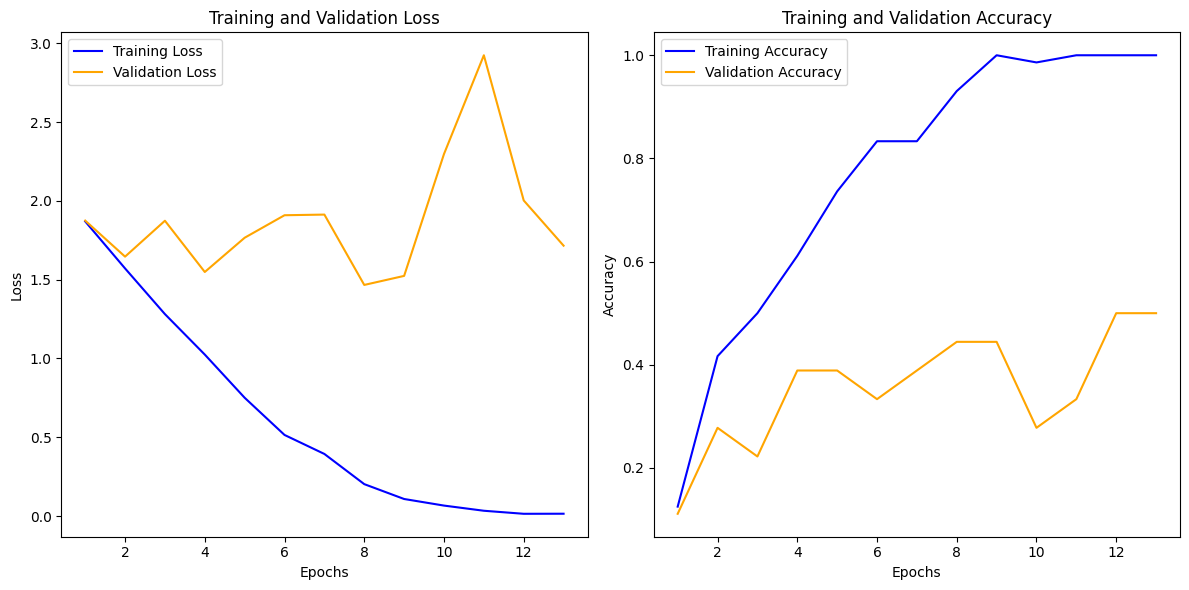

In [44]:
# 'history' is the object returned by model.fit()
# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()